In [1]:
# pip install 

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Bar, Line, WordCloud
from wordcloud import WordCloud
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from pandas.errors import EmptyDataError
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [3]:



def load_data():
    # Ëé∑ÂèñÁõÆÂΩïË∑ØÂæÑ
    author_dir = '../data/author/author.csv'
    video_dir = '../data/video/'
    comment_dir = '../data/comment/'

    # ËØªÂèñ‰ΩúËÄÖ‰ø°ÊÅØ
    try:
        author_df = pd.read_csv(author_dir)
    except Exception as e:
        print(f"ËØªÂèñ‰ΩúËÄÖÊñá‰ª∂Êó∂ÂèëÁîüÈîôËØØ: {e}")
        author_df = pd.DataFrame()  # Â¶ÇÊûúËØªÂèñÂ§±Ë¥•ÔºåËøîÂõû‰∏Ä‰∏™Á©∫ÁöÑ DataFrame

    # ËØªÂèñÊâÄÊúâËßÜÈ¢ë‰ø°ÊÅØ
    video_files = [f for f in os.listdir(video_dir) if f.endswith('_video.csv')]
    video_df_list = []
    for video_file in video_files:
        video_file_path = os.path.join(video_dir, video_file)
        
        # Ê£ÄÊü•ËßÜÈ¢ëÊñá‰ª∂ÊòØÂê¶‰∏∫Á©∫
        if os.path.getsize(video_file_path) == 0:
            print(f"Ë∑≥ËøáÁ©∫ËßÜÈ¢ëÊñá‰ª∂: {video_file_path}")
            continue
        
        try:
            video_data = pd.read_csv(video_file_path, on_bad_lines='skip')  # Ë∑≥ËøáÈîôËØØË°å
            video_data['author_id'] = video_file.split('_')[0]  # Ê∑ªÂä†‰ΩúËÄÖID
            video_df_list.append(video_data)
        except Exception as e:
            print(f"ËØªÂèñËßÜÈ¢ëÊñá‰ª∂Êó∂ÂèëÁîüÈîôËØØ: {e}")
    
    if video_df_list:  # Â¶ÇÊûúËßÜÈ¢ëÊï∞ÊçÆÈùûÁ©∫ÔºåËøõË°åÊãºÊé•
        video_df = pd.concat(video_df_list, ignore_index=True)
    else:
        video_df = pd.DataFrame()  # Â¶ÇÊûúÊ≤°ÊúâÊúâÊïàÊï∞ÊçÆÔºåËøîÂõûÁ©∫ÁöÑ DataFrame

    # ËØªÂèñÊâÄÊúâËØÑËÆ∫‰ø°ÊÅØ
    comment_df_list = []
    required_columns = ['comment_id', 'author_name', 'content', 'create_time', 'create_time_text', 'like_count', 'reply_count', 'is_anonymous']
    
    for author_id in os.listdir(comment_dir):
        author_comments = os.path.join(comment_dir, author_id)
        if os.path.isdir(author_comments):
            for comment_file in os.listdir(author_comments):
                if comment_file.endswith('_comment.csv'):
                    comment_file_path = os.path.join(author_comments, comment_file)

                    try:
                        # Â∞ùËØïËØªÂèñËØÑËÆ∫Êñá‰ª∂
                        comment_data = pd.read_csv(comment_file_path, on_bad_lines='skip')  # Ë∑≥ËøáÈîôËØØË°å

                        comment_data['author_id'] = author_id  # Ê∑ªÂä†‰ΩúËÄÖID
                        comment_data['video_id'] = comment_file.split('_')[0]  # Ê∑ªÂä†ËßÜÈ¢ëID
                        comment_df_list.append(comment_data)
                    except EmptyDataError:
                        # ÁâπÊÆäÂ§ÑÁêÜÁ©∫Êï∞ÊçÆÁöÑÊñá‰ª∂
                        print(f"ËØÑËÆ∫Êñá‰ª∂‰∏∫Á©∫ÔºåÂàùÂßãÂåñÁ©∫ DataFrameÔºö{comment_file_path}")
                        # Âä†Ë°®Â§¥
                        empty_comment_data = pd.DataFrame(columns=required_columns)
                        empty_comment_data.to_csv(comment_file_path, index=False)
                        print(f"Â∑≤ÂàõÂª∫Á©∫ DataFrameÔºö{comment_file_path}")
                        empty_comment_data['author_id'] = author_id  # Ê∑ªÂä†‰ΩúËÄÖID
                        empty_comment_data['video_id'] = comment_file.split('_')[0]  # Ê∑ªÂä†ËßÜÈ¢ëID
                        comment_df_list.append(empty_comment_data)
                    except Exception as e:
                        print(f"ËØªÂèñËØÑËÆ∫Êñá‰ª∂Êó∂ÂèëÁîüÈîôËØØ: {e}")
                        print(f"Ë∑≥ËøáÊó†ÊïàËØÑËÆ∫Êñá‰ª∂: {comment_file_path}")

    if comment_df_list:  # Â¶ÇÊûúËØÑËÆ∫Êï∞ÊçÆÈùûÁ©∫ÔºåËøõË°åÊãºÊé•
        comment_df = pd.concat(comment_df_list, ignore_index=True)
    else:
        comment_df = pd.DataFrame()  # Â¶ÇÊûúÊ≤°ÊúâÊúâÊïàÊï∞ÊçÆÔºåËøîÂõûÁ©∫ÁöÑ DataFrame

    return author_df, video_df, comment_df

# Âä†ËΩΩÊï∞ÊçÆ
author_df, video_df, comment_df = load_data()

# ËæìÂá∫Êï∞ÊçÆ‰ª•È™åËØÅ
print("‰ΩúËÄÖÊï∞ÊçÆË°åÊï∞:", len(author_df))
print("ËßÜÈ¢ëÊï∞ÊçÆË°åÊï∞:", len(video_df))
print("ËØÑËÆ∫Êï∞ÊçÆË°åÊï∞:", len(comment_df))



‰ΩúËÄÖÊï∞ÊçÆË°åÊï∞: 710
ËßÜÈ¢ëÊï∞ÊçÆË°åÊï∞: 20981
ËØÑËÆ∫Êï∞ÊçÆË°åÊï∞: 271522


# (a) ÊèèËø∞ÁªüËÆ°ÂàÜÊûê

In [9]:



# Ë¥¶Âè∑Êï∞ÊçÆÊèèËø∞ÁªüËÆ°
author_desc = author_df.describe()

# ËßÜÈ¢ëÊï∞ÊçÆÊèèËø∞ÁªüËÆ°
video_desc = video_df.describe()

# ÊâìÂç∞ÊèèËø∞ÁªüËÆ°
print("Ë¥¶Âè∑Êï∞ÊçÆÊèèËø∞ÁªüËÆ°:")
print(author_desc)
print("\nËßÜÈ¢ëÊï∞ÊçÆÊèèËø∞ÁªüËÆ°:")
print(video_desc)


Ë¥¶Âè∑Êï∞ÊçÆÊèèËø∞ÁªüËÆ°:
       vip_status    fans_count   video_count
count  710.000000  7.100000e+02    710.000000
mean     1.073239  1.429500e+05   4055.826761
std      1.083399  3.067834e+05   5734.601078
min      0.000000  2.000000e+00      0.000000
25%      0.000000  2.287325e+04    548.750000
50%      1.000000  6.653800e+04   1245.500000
75%      1.750000  1.432855e+05   4863.250000
max      3.000000  4.987660e+06  32783.000000

ËßÜÈ¢ëÊï∞ÊçÆÊèèËø∞ÁªüËÆ°:
                 id     like_count  comment_count    play_count
count  2.098100e+04   20981.000000   20981.000000  2.098100e+04
mean   8.733813e+18     542.867976      18.809971  3.429007e+04
std    4.711625e+18    4129.515859      91.341695  1.749536e+05
min    6.728563e+14       0.000000       0.000000  0.000000e+00
25%    5.036524e+18      12.000000       3.000000  1.289000e+03
50%    8.533356e+18      51.000000       6.000000  5.441000e+03
75%    1.224190e+19     224.000000      14.000000  2.096900e+04
max    1.844674e+19  

# (b) Áõ∏ÂÖ≥ÊÄßÂàÜÊûê
Êàë‰ª¨È¶ñÂÖàÈÄöËøáÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÊù•ÂØπÊï∞ÊçÆËøõË°åÁõ∏ÂÖ≥ÊÄßÂàÜÊûê„ÄÇ

In [10]:
# ‰∏∫‰∫ÜÂ∞ÜÁõ∏ÂÖ≥ÂàóÂêàÂπ∂Âà∞‰∏ÄËµ∑ÔºåÊàë‰ª¨‰ª• author_id ‰∏∫ÂÖ≥ËÅîÈîÆËøõË°åÂêàÂπ∂
merged_df = pd.merge(video_df, author_df, on='author_id', how='inner')

# Â¶ÇÊûúÊÉ≥ÊääËØÑËÆ∫Áõ∏ÂÖ≥ÁöÑÊï∞ÊçÆ‰πüÂêàÂπ∂ËøõÊù•Ôºå‰ª• video_id ‰∏∫ÂÖ≥ËÅîÈîÆÔºàÂÅáËÆæ comment_df ‰∏≠Êúâ video_id ÂàóÊù•ÂÖ≥ËÅîËßÜÈ¢ëÔºâ
# merged_df = pd.merge(merged_df, comment_df, on='video_id', how='inner')
# Â∞Ü vip_status ÂàóËΩ¨Êç¢‰∏∫Êï∞ÂÄºÂΩ¢ÂºèÔºåÂÅáËÆæ 0 Ë°®Á§∫ÈùûËÆ§ËØÅÔºå1 Ë°®Á§∫ËÆ§ËØÅ
merged_df['vip_status'] = merged_df['vip_status'].apply(lambda x: 0 if x == 0 else 1)

# ÊèêÂèñÊàë‰ª¨ÊÉ≥Ë¶ÅÂàÜÊûêÂàó
data = merged_df[['like_count', 'fans_count', 'comment_count', 'vip_status', 'video_count', 'play_count']].dropna()  # ÂéªÈô§ÂåÖÂê´Áº∫Â§±ÂÄºÁöÑË°å
# ËÆ°ÁÆóÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Áü©Èòµ
correlation_matrix = data.corr()

print("ÁÇπËµûÈáè„ÄÅÁ≤â‰∏ùÊï∞„ÄÅËØÑËÆ∫Èáè„ÄÅvip_status Âíå video_count ÁöÑÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÔºö")
print(correlation_matrix)

ÁÇπËµûÈáè„ÄÅÁ≤â‰∏ùÊï∞„ÄÅËØÑËÆ∫Èáè„ÄÅvip_status Âíå video_count ÁöÑÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÔºö
               like_count  fans_count  comment_count  vip_status  video_count  \
like_count       1.000000    0.062793       0.710161   -0.011043    -0.077591   
fans_count       0.062793    1.000000       0.051352    0.251387     0.212021   
comment_count    0.710161    0.051352       1.000000   -0.006053    -0.090522   
vip_status      -0.011043    0.251387      -0.006053    1.000000     0.353979   
video_count     -0.077591    0.212021      -0.090522    0.353979     1.000000   
play_count       0.512622    0.080697       0.456857    0.025073    -0.103443   

               play_count  
like_count       0.512622  
fans_count       0.080697  
comment_count    0.456857  
vip_status       0.025073  
video_count     -0.103443  
play_count       1.000000  


### Êï¥‰ΩìÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÊ¶ÇËø∞
Êàë‰ª¨ÂæóÂà∞‰∫ÜÂåÖÂê´ÁÇπËµûÈáèÔºà`like_count`Ôºâ„ÄÅÁ≤â‰∏ùÊï∞Ôºà`fans_count`Ôºâ„ÄÅËØÑËÆ∫ÈáèÔºà`comment_count`Ôºâ„ÄÅ`vip_status`„ÄÅ`video_count`‰ª•ÂèäÊí≠ÊîæÈáèÔºà`play_count`ÔºâËøôÂá†‰∏™ÂèòÈáèÁöÑÁöÆÂ∞îÈÄäÁõ∏ÂÖ≥Á≥ªÊï∞Áü©ÈòµÔºåÈÄöËøáÂàÜÊûêÁü©Èòµ‰∏≠ÁöÑÂêÑ‰∏™Á≥ªÊï∞ÔºåÂèØ‰ª•‰∫ÜËß£Ëøô‰∫õÂèòÈáè‰πãÈó¥ÁöÑÁ∫øÊÄßÁõ∏ÂÖ≥ÂÖ≥Á≥ªÔºå‰ª•‰∏ãÊòØÂÖ∑‰ΩìÂàÜÊûêÔºö

### ÁÇπËµûÈáèÔºà`like_count`ÔºâÁõ∏ÂÖ≥ÂàÜÊûê
- **‰∏éÁ≤â‰∏ùÊï∞Ôºà`fans_count`ÔºâÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.062793`ÔºåÊé•Ëøë 0ÔºåËØ¥ÊòéÁÇπËµûÈáèÂíåÁ≤â‰∏ùÊï∞‰πãÈó¥Á∫øÊÄßÁõ∏ÂÖ≥ÊÄßËæÉÂº±„ÄÇËøôÊÑèÂë≥ÁùÄÂàõ‰ΩúËÄÖÁöÑÁ≤â‰∏ùÊï∞ÈáèÂ§öÂ∞ëÔºåÂπ∂‰∏çËÉΩÂæàÂ•ΩÂú∞Áõ¥Êé•È¢ÑÊµãÂÖ∂ËßÜÈ¢ëËé∑ÂæóÁöÑÁÇπËµûÈáè„ÄÇÊØîÂ¶ÇÊúâÁöÑÂàõ‰ΩúËÄÖËôΩÁ≤â‰∏ù‰ºóÂ§öÔºå‰ΩÜÂèëÂ∏ÉÁöÑËßÜÈ¢ëÂÜÖÂÆπ‰∏ç‰∏ÄÂÆöÂ•ëÂêàÁ≤â‰∏ùÂñúÂ•ΩÔºåÁÇπËµûÈáèÂ∞±Êú™ÂøÖÈ´òÔºõËÄå‰∏Ä‰∫õÁ≤â‰∏ùÁõ∏ÂØπÂ∞ëÁöÑÂàõ‰ΩúËÄÖÔºåÂá≠ÂÄü‰ºòË¥®‰∏îÊúâÈíàÂØπÊÄßÁöÑËßÜÈ¢ëÂÜÖÂÆπÔºå‰πüËÉΩÊî∂Ëé∑ËæÉÂ§öÁÇπËµû„ÄÇ
- **‰∏éËØÑËÆ∫ÈáèÔºà`comment_count`ÔºâÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.710161`ÔºåÊØîËæÉÊé•Ëøë 1Ôºå**ÂëàÁé∞Âá∫ËæÉÂº∫ÁöÑÊ≠£Áõ∏ÂÖ≥ÂÖ≥Á≥ª**„ÄÇË°®ÊòéÈÄöÂ∏∏ÊÉÖÂÜµ‰∏ãÔºåËßÜÈ¢ëËé∑ÂæóÁöÑÁÇπËµûÈáèË∂äÂ§öÔºåÂê∏ÂºïÂà∞ÁöÑËØÑËÆ∫Êï∞ÈáèÂæÄÂæÄ‰πüË∂äÂ§ö„ÄÇÂõ†‰∏∫ËßÇ‰ºóËÆ§ÂèØËßÜÈ¢ëÊó∂ÔºåÂú®ÁÇπËµûÁöÑÂêåÊó∂Êõ¥ÂÄæÂêë‰∫éÂèëË°®Ëá™Â∑±ÁöÑÁúãÊ≥ïÂèÇ‰∏éËÆ®ËÆ∫ÔºåÊâÄ‰ª•ÁÇπËµûÈáèÂíåËØÑËÆ∫ÈáèÊï¥‰ΩìÂëàÂêåÂêëÂèòÂåñË∂ãÂäø„ÄÇ
- **‰∏é `vip_status` ÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞ÊòØ `-0.011043`ÔºåÊé•Ëøë 0ÔºåÊÑèÂë≥ÁùÄ‰ªéÁ∫øÊÄßËßíÂ∫¶Êù•ÁúãÔºåËßÜÈ¢ëÁöÑÁÇπËµûÈáè‰∏éÂàõ‰ΩúËÄÖÊòØÂê¶‰∏∫ËÆ§ËØÅ‰ºöÂëòÔºà`vip_status`Ôºâ‰πãÈó¥Áõ∏ÂÖ≥ÊÄßÊûÅÂº±„ÄÇÂàõ‰ΩúËÄÖÁöÑËÆ§ËØÅÁä∂ÊÄÅÂØπËßÜÈ¢ëËé∑ÂæóÁÇπËµûÈáèÂπ∂Ê≤°ÊúâÊòéÊòæÁõ¥Êé•ÁöÑÁ∫øÊÄßÂΩ±ÂìçÔºå‰∏çËøáÂú®ËØ∏Â¶ÇÂπ≥Âè∞Êé®ËçêËµÑÊ∫êÂàÜÈÖçÁ≠âÂÖ∂‰ªñÈùûÁõ¥Êé•Á∫øÊÄßÂõ†Á¥†ÊñπÈù¢ÔºåËÆ§ËØÅÁä∂ÊÄÅ‰πüËÆ∏‰ºöÈó¥Êé•ÂΩ±ÂìçÁÇπËµûÈáè„ÄÇ
- **‰∏é `video_count` ÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `-0.077591`ÔºåÊé•Ëøë 0ÔºåË°®ÊòéÁÇπËµûÈáèÂíåÂàõ‰ΩúËÄÖÂèëÂ∏ÉÁöÑËßÜÈ¢ëÊÄªÊï∞‰πãÈó¥Á∫øÊÄßÂÖ≥Á≥ª‰∏çÊòéÊòæ„ÄÇÂç≥ËßÜÈ¢ëÁöÑÁÇπËµûÈáèÊõ¥Â§öÂèñÂÜ≥‰∫éËßÜÈ¢ëÊú¨Ë∫´Ë¥®Èáè„ÄÅÂê∏ÂºïÂäõ‰ª•ÂèäÂèó‰ºóÂ•ëÂêàÂ∫¶Á≠âÂõ†Á¥†ÔºåËÄå‰∏çÊòØÂàõ‰ΩúËÄÖÂèëÂ∏ÉËßÜÈ¢ëÊï∞ÈáèÁöÑÂ§öÂ∞ë„ÄÇ
- **‰∏éÊí≠ÊîæÈáèÔºà`play_count`ÔºâÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.512622`Ôºå**ÂëàÁé∞Âá∫‰∏ÄÂÆöÁ®ãÂ∫¶ÁöÑÊ≠£Áõ∏ÂÖ≥ÂÖ≥Á≥ª**„ÄÇÊÑèÂë≥ÁùÄÈöèÁùÄÊí≠ÊîæÈáèÁöÑÂ¢ûÂä†ÔºåÁÇπËµûÈáè‰πüÊúâËæÉÂ§ßÂèØËÉΩÈöè‰πãÂ¢ûÂä†Ôºå‰∏çËøáÁõ∏ÂÖ≥Á≥ªÊï∞Âπ∂ÈùûÂæàÈ´òÔºåËØ¥ÊòéÈô§Êí≠ÊîæÈáèÂ§ñÔºåËøòÊúâÂ¶ÇËßÜÈ¢ëÂÜÖÂÆπ„ÄÅÂèó‰ºóÁâπÁÇπÁ≠âÂÖ∂‰ªñÂõ†Á¥†ÂΩ±ÂìçÁÇπËµûÈáè„ÄÇ

### Á≤â‰∏ùÊï∞Ôºà`fans_count`ÔºâÁõ∏ÂÖ≥ÂàÜÊûê
- **‰∏éËØÑËÆ∫ÈáèÔºà`comment_count`ÔºâÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.051352`ÔºåÊé•Ëøë 0ÔºåÊòæÁ§∫Âá∫Á≤â‰∏ùÊï∞ÂíåËØÑËÆ∫Èáè‰πãÈó¥ÁöÑÁ∫øÊÄßÁõ∏ÂÖ≥ÊÄß‰∏çÂº∫„ÄÇÂ∞ΩÁÆ°Á≤â‰∏ùÊòØËØÑËÆ∫ÁöÑÊΩúÂú®ÂèÇ‰∏éËÄÖÔºå‰ΩÜ‰ªéÁ∫øÊÄßÂÖ≥Á≥ªËßíÂ∫¶ÔºåÁ≤â‰∏ùÊï∞ÈáèÂ§öÂ∞ëÂπ∂‰∏çËÉΩÁõ¥Êé•‰ΩìÁé∞ËßÜÈ¢ëËØÑËÆ∫ÈáèÈ´ò‰Ωé„ÄÇËøôÂèØËÉΩÁî±‰∫éÁ≤â‰∏ùÊ¥ªË∑ÉÂ∫¶‰∏çÂêå„ÄÅËßÜÈ¢ëÂÜÖÂÆπÂØπ‰∏çÂêåÁ≤â‰∏ùÁæ§‰ΩìÂê∏ÂºïÂäõÊúâÂ∑ÆÂºÇÁ≠âÂõ†Á¥†ÂØºËá¥Ôºå‰æãÂ¶ÇÊúâÁöÑÂàõ‰ΩúËÄÖÁ≤â‰∏ùÂ§ö‰ΩÜÊ¥ªË∑ÉÂ∫¶‰ΩéÔºåËØÑËÆ∫Èáè‰∏ç‰∏ÄÂÆöÂ§öÔºõËÄåÁ≤â‰∏ùÂ∞ëÁöÑÂàõ‰ΩúËÄÖËã•ËßÜÈ¢ëËØùÈ¢òÊÄßÂº∫ÔºåËÉΩÂê∏ÂºïÂ§ßÈáèÈùûÁ≤â‰∏ùËßÇ‰ºóËØÑËÆ∫„ÄÇ
- **‰∏é `vip_status` ÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.251387`ÔºåÊúâ‰∏ÄÂÆöÊï∞ÂÄº‰ΩÜ‰∏çÁÆóÈ´òÔºåËØ¥ÊòéÂàõ‰ΩúËÄÖÁöÑÁ≤â‰∏ùÊï∞Èáè‰∏éËÆ§ËØÅÁä∂ÊÄÅ‰πãÈó¥Â≠òÂú®‰∏ÄÂÆöÂÖ≥ËÅîÔºå‰ΩÜÂπ∂ÈùûÂº∫Áõ∏ÂÖ≥ÂÖ≥Á≥ª„ÄÇËÆ§ËØÅÁä∂ÊÄÅÊàñËÆ∏Âú®‰∏ÄÂÆöÁ®ãÂ∫¶‰∏äÊúâÂä©‰∫éÂê∏ÂºïÁ≤â‰∏ùÂÖ≥Ê≥®Ôºå‰∏çËøáÁ≤â‰∏ùÁßØÁ¥ØËøòÂèóËØ∏Â¶ÇÂÜÖÂÆπÈ£éÊ†º„ÄÅÊåÅÁª≠Âàõ‰ΩúËÉΩÂäõÁ≠â‰ºóÂ§öÂÖ∂‰ªñÂõ†Á¥†ÂΩ±Âìç„ÄÇ
- **‰∏é `video_count` ÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.212021`ÔºåË°®Êòé‰∫åËÄÖÂ≠òÂú®‰∏ÄÂÆöÂÖ≥ËÅîÔºå‰ΩÜÂπ∂ÈùûÁ¥ßÂØÜÁöÑÁ∫øÊÄßÂÖ≥Á≥ª„ÄÇÂàõ‰ΩúËÄÖÂèëÂ∏ÉËßÜÈ¢ëÊï∞ÈáèÂ¢ûÂ§öÔºåÂèØËÉΩ‰ºöÂ¢ûÂä†‰∏Ä‰∫õÁ≤â‰∏ùÁßØÁ¥ØÊú∫‰ºöÔºå‰ΩÜ‰∏çÊòØÂîØ‰∏ÄÂÜ≥ÂÆöÂõ†Á¥†ÔºåËßÜÈ¢ëË¥®ÈáèÂíåÁâπËâ≤Á≠âÂØπÂê∏Âºï„ÄÅÁïô‰ΩèÁ≤â‰∏ùËµ∑ÁùÄÂÖ≥ÈîÆ‰ΩúÁî®„ÄÇ
- **‰∏éÊí≠ÊîæÈáèÔºà`play_count`ÔºâÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.080697`ÔºåÊé•Ëøë 0ÔºåËØ¥ÊòéÁ≤â‰∏ùÊï∞ÂíåÊí≠ÊîæÈáè‰πãÈó¥Á∫øÊÄßÁõ∏ÂÖ≥ÊÄßËæÉÂº±„ÄÇÁ≤â‰∏ùÊï∞ÈáèÂ§ö‰∏ç‰∏ÄÂÆöÁõ¥Êé•Â∏¶Êù•È´òÊí≠ÊîæÈáèÔºåËßÜÈ¢ëÁöÑ‰º†Êí≠ÊïàÊûúÊõ¥Â§öÂèóÂÜÖÂÆπÊòØÂê¶Âê∏Âºï‰∫∫„ÄÅÊòØÂê¶ËÉΩË¢´ÂπøÊ≥õÊé®ËçêÁ≠âÂõ†Á¥†ÂΩ±Âìç„ÄÇ

### ËØÑËÆ∫ÈáèÔºà`comment_count`ÔºâÁõ∏ÂÖ≥ÂàÜÊûê
- **‰∏é `vip_status` ÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `-0.006053`ÔºåÊé•Ëøë 0ÔºåËØ¥ÊòéÂàõ‰ΩúËÄÖÁöÑËÆ§ËØÅÁä∂ÊÄÅÔºà`vip_status`ÔºâÂØπËßÜÈ¢ëËØÑËÆ∫ÈáèÁöÑÁ∫øÊÄßÂΩ±Âìç‰∏çÂ§ß„ÄÇËßÇ‰ºóÊòØÂê¶ËØÑËÆ∫‰∏ªË¶ÅÂèñÂÜ≥‰∫éËßÜÈ¢ëÂÜÖÂÆπË∂£Âë≥ÊÄß„ÄÅËØùÈ¢òÊÄß‰ª•ÂèäËÉΩÂê¶ÂºïÂèëÂÖ±È∏£Á≠âÂõ†Á¥†ÔºåËÄåÈùûÂàõ‰ΩúËÄÖÊòØÂê¶ËÆ§ËØÅ‰ºöÂëò„ÄÇ
- **‰∏é `video_count` ÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `-0.090522`ÔºåÊé•Ëøë 0Ôºå‰ª£Ë°®ËßÜÈ¢ëÊï∞Èáè‰∏éËØÑËÆ∫Èáè‰πãÈó¥Á∫øÊÄßÂÖ≥Á≥ª‰∏çÊòéÊòæ„ÄÇÂç≥‰æøÂàõ‰ΩúËÄÖÂèëÂ∏ÉËßÜÈ¢ëÊï∞ÈáèÂ§öÔºåËÉΩË¶ÜÁõñÊõ¥ÂπøÊ≥õÂèó‰ºóÁæ§‰ΩìÔºå‰ΩÜ‰∏ç‰∏ÄÂÆöËÉΩÊøÄÂèëÊõ¥Â§öËØÑËÆ∫ÔºåÂÖ≥ÈîÆËøòÂú®‰∫éÂçï‰∏™ËßÜÈ¢ëÂÜÖÂÆπËÉΩÂê¶Âê∏ÂºïËßÇ‰ºóËØÑËÆ∫„ÄÇ
- **‰∏éÊí≠ÊîæÈáèÔºà`play_count`ÔºâÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.456857`ÔºåÂëàÁé∞**‰∏ÄÂÆöÁ®ãÂ∫¶Ê≠£Áõ∏ÂÖ≥ÂÖ≥Á≥ª**„ÄÇÊí≠ÊîæÈáèÂ¢ûÂä†Êó∂ÔºåËØÑËÆ∫Èáè‰πüÊúâÈöè‰πãÂ¢ûÂ§öÁöÑË∂ãÂäøÔºåÂõ†‰∏∫Êí≠ÊîæÈáèÈ´òÊÑèÂë≥ÁùÄËßÜÈ¢ëÊõùÂÖâÂ∫¶Â§ßÔºåÊõ¥ÊòìÂê∏ÂºïËßÇ‰ºóÂèÇ‰∏éËÆ®ËÆ∫Ôºå‰ΩÜ‰πüÂèóËßÜÈ¢ëÂÜÖÂÆπÊú¨Ë∫´ËÉΩÂê¶ÂºïÂèëËÆ®ËÆ∫Á≠âÂõ†Á¥†ÂΩ±Âìç„ÄÇ

### `vip_status` Áõ∏ÂÖ≥ÂàÜÊûê
- **‰∏é `video_count` ÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.353979`ÔºåÊúâ‰∏ÄÂÆöÁöÑÁõ∏ÂÖ≥ÊÄßÔºåË°®ÊòéÂàõ‰ΩúËÄÖÁöÑËÆ§ËØÅÁä∂ÊÄÅÂíåÂÖ∂Âàõ‰ΩúÊ¥ªË∑ÉÂ∫¶ÔºàËßÜÈ¢ëÊï∞ÈáèÔºâ‰πãÈó¥Â≠òÂú®‰∏ÄÂÆöÂÖ≥ËÅî„ÄÇÂèØËÉΩËÆ§ËØÅ‰ºöÂëòËÉΩ‰∫´ÂèóÂà∞Âπ≥Âè∞Êõ¥Â§öÂàõ‰ΩúËµÑÊ∫ê„ÄÅÊøÄÂä±Êú∫Âà∂Á≠âÔºå‰ªéËÄå‰øÉ‰Ωø‰ªñ‰ª¨Êõ¥ÊúâÂä®ÂäõÊàñÊúâÊõ¥Â•ΩÊù°‰ª∂Âàõ‰ΩúÊõ¥Â§öËßÜÈ¢ëÔºå‰ΩÜËøô‰∏ÄÂÖ≥ËÅîÂπ∂ÈùûÂæàÂº∫ÔºåËßÜÈ¢ëÊï∞ÈáèËøòÂèóÂàõ‰ΩúËÄÖ‰∏™‰∫∫Âàõ‰ΩúÊÑèÊÑø„ÄÅÊó∂Èó¥Á≤æÂäõÁ≠âÂ§öÁßçÂõ†Á¥†ÂΩ±Âìç„ÄÇ
- **‰∏éÊí≠ÊîæÈáèÔºà`play_count`ÔºâÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `0.025073`ÔºåÊé•Ëøë 0ÔºåÊÑèÂë≥ÁùÄÂàõ‰ΩúËÄÖÁöÑËÆ§ËØÅÁä∂ÊÄÅ‰∏éÊí≠ÊîæÈáè‰πãÈó¥Á∫øÊÄßÁõ∏ÂÖ≥ÊÄßÊûÅÂº±„ÄÇËÆ§ËØÅ‰∏éÂê¶Âú®Á∫øÊÄßÂ±ÇÈù¢‰∏äÂØπËßÜÈ¢ëÊí≠ÊîæÈáèÂΩ±Âìç‰∏çÂ§ßÔºåÊí≠ÊîæÈáèÊõ¥Â§öÂèñÂÜ≥‰∫éËßÜÈ¢ëÊú¨Ë∫´ÁöÑÂê∏ÂºïÂäõ‰ª•ÂèäÂπ≥Âè∞Êé®ËçêÁ≠âÂõ†Á¥†„ÄÇ

### `video_count` Áõ∏ÂÖ≥ÂàÜÊûê
- **‰∏éÊí≠ÊîæÈáèÔºà`play_count`ÔºâÁöÑÁõ∏ÂÖ≥ÊÄß**Ôºö
    Áõ∏ÂÖ≥Á≥ªÊï∞‰∏∫ `-0.103443`ÔºåÊé•Ëøë 0ÔºåË°®ÊòéÂàõ‰ΩúËÄÖÂèëÂ∏ÉÁöÑËßÜÈ¢ëÊÄªÊï∞ÂíåÊí≠ÊîæÈáè‰πãÈó¥Á∫øÊÄßÂÖ≥Á≥ª‰∏çÊòéÊòæ„ÄÇÂàõ‰ΩúËÄÖËßÜÈ¢ëÊï∞ÈáèÂ§öÂπ∂‰∏ç‰∏ÄÂÆöÊÑèÂë≥ÁùÄÂçï‰∏™ËßÜÈ¢ëÊàñËÄÖÊï¥‰ΩìÊí≠ÊîæÈáèÂ∞±È´òÔºåÊí≠ÊîæÈáè‰∏ªË¶ÅËøòÊòØÂèóÂêÑËßÜÈ¢ëËá™Ë∫´Ë¥®Èáè„ÄÅËØùÈ¢òÁÉ≠Â∫¶‰ª•ÂèäÂπ≥Âè∞Êé®ËçêÁ≠âÂõ†Á¥†ÂΩ±Âìç„ÄÇ

‰ªé‰∏≠ÂæóÂá∫ÁÇπËµûÈáè„ÄÅËØÑËÆ∫Èáè‰ª•ÂèäÊí≠ÊîæÈáè‰πãÈó¥Â≠òÂú®ÁùÄËæÉ‰∏∫ÂØÜÂàáÁöÑËÅîÁ≥ª
Êàë‰ª¨ÈÄâÊã©ÁÇπËµûÈáèÂíåËØÑËÆ∫ÈáèÔºåÁªòÂà∂Êï£ÁÇπÂõæ

Êï£ÁÇπÂõæ


e:\anaconda3\envs\py385\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda3\envs\py385\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36190 (\N{CJK UNIFIED IDEOGRAPH-8D5E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda3\envs\py385\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda3\envs\py385\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35780 (\N{CJK UNIFIED IDEOGRAPH-8BC4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda3\envs\py385\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35770 (\N{CJK UNIFIED IDEOGRAPH-8BBA}) missing from current font.
  fig.canvas.print_figure(bytes_io, *

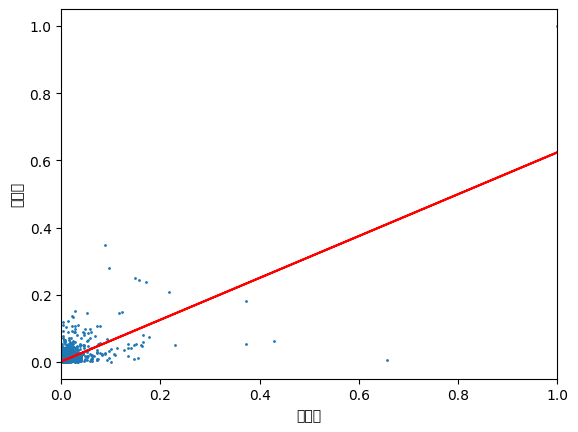

ÁÇπËµûÈáè‰∏éËØÑËÆ∫ÈáèÁöÑÁõ∏ÂÖ≥ÊÄß:
               like_count  comment_count
like_count       1.000000       0.710169
comment_count    0.710169       1.000000


In [14]:
# ÂΩí‰∏ÄÂåñÁÇπËµûÈáèÂíåËØÑËÆ∫Èáè
scaler = MinMaxScaler()
video_df[['like_count', 'comment_count']] = scaler.fit_transform(video_df[['like_count', 'comment_count']])

# ËÆ°ÁÆóÁõ∏ÂÖ≥ÊÄß
correlation = video_df[['like_count', 'comment_count']].corr()

print('Êï£ÁÇπÂõæ')
x = video_df['like_count']
y = video_df['comment_count']
plt.scatter(x, y, s=1)
# ËÆæÁΩÆÊ®™ËΩ¥ËåÉÂõ¥
plt.xlim(0, 1)
plt.xlabel('ÁÇπËµûÈáè')
plt.ylabel('ËØÑËÆ∫Èáè')

# ÊãüÂêàÁõ¥Á∫ø
fit = np.polyfit(x, y, 1)  # ÊãüÂêà‰∏ÄÊ¨°Â§öÈ°πÂºèÔºàÂç≥Áõ¥Á∫øÔºâÔºåËøîÂõûÊãüÂêàÁöÑÁ≥ªÊï∞
fit_fn = np.poly1d(fit)  # Ê†πÊçÆÊãüÂêàÁ≥ªÊï∞ÁîüÊàêÂØπÂ∫îÁöÑÂ§öÈ°πÂºèÂáΩÊï∞ÂØπË±°
plt.plot(x, fit_fn(x), 'r')  # ÁªòÂà∂ÊãüÂêàÁõ¥Á∫øÔºåÈ¢úËâ≤ËÆæÁΩÆ‰∏∫Á∫¢Ëâ≤Ôºà'r'Ôºâ

plt.show()

# ÊâìÂç∞Áõ∏ÂÖ≥ÊÄßÁü©Èòµ
print("ÁÇπËµûÈáè‰∏éËØÑËÆ∫ÈáèÁöÑÁõ∏ÂÖ≥ÊÄß:")
print(correlation)

(c) ÂØπÊØîÂàÜÊûê

C:\Users\86136\AppData\Local\Temp\ipykernel_83620\3864637377.py:45: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from current font.
  plt.tight_layout()
C:\Users\86136\AppData\Local\Temp\ipykernel_83620\3864637377.py:45: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  plt.tight_layout()
e:\anaconda3\envs\py385\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\anaconda3\envs\py385\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


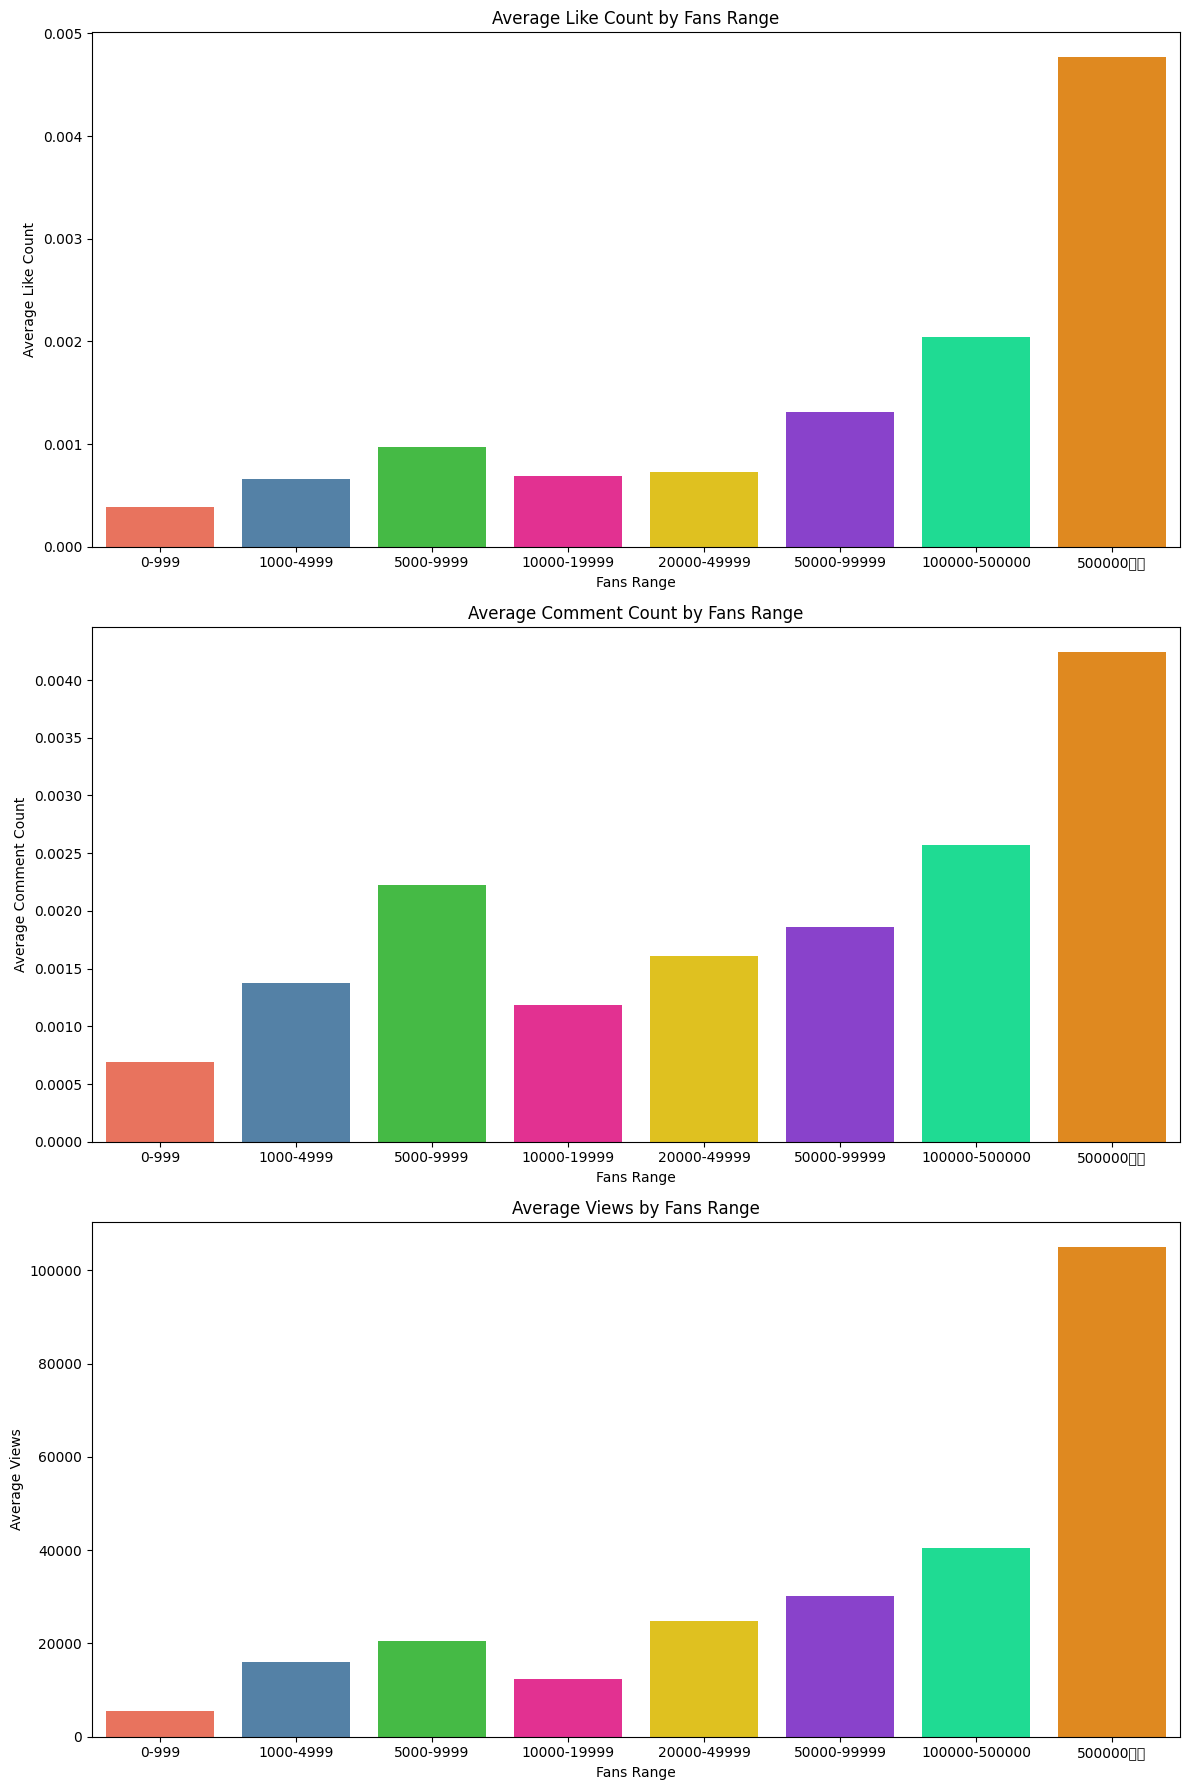

In [15]:
# Á°Æ‰øù author_id ÂàóÁöÑÁ±ªÂûãÁõ∏Âêå
video_df['author_id'] = video_df['author_id'].astype(str)
author_df['author_id'] = author_df['author_id'].astype(str)

# ÂêàÂπ∂‰ΩúËÄÖÂíåËßÜÈ¢ëÊï∞ÊçÆ
df = pd.merge(video_df, author_df[['author_id', 'fans_count']], on='author_id', how='left')

# ÂàíÂàÜÁ≤â‰∏ùÈáèÂå∫Èó¥
bins = [0, 999, 4999, 9999, 19999, 49999, 99999, 500000, float('inf')]
labels = ['0-999', '1000-4999', '5000-9999', '10000-19999', '20000-49999', '50000-99999', '100000-500000', '500000‰ª•‰∏ä']
df['fans_range'] = pd.cut(df['fans_count'], bins=bins, labels=labels, right=False)

# ËÆ°ÁÆóÊØè‰∏™Ê°£Ê¨°ÁöÑÂçö‰∏ªÁöÑÂπ≥ÂùáÁÇπËµûÊï∞„ÄÅÂπ≥ÂùáËØÑËÆ∫Êï∞ÂíåÂπ≥ÂùáËßÜÈ¢ëÊí≠ÊîæÈáè
fans_grouped = df.groupby('fans_range').agg({
    'like_count': 'mean',  # Âπ≥ÂùáÁÇπËµûÊï∞
    'comment_count': 'mean',  # Âπ≥ÂùáËØÑËÆ∫Êï∞
    'play_count': 'mean',  # Âπ≥ÂùáËßÜÈ¢ëÊí≠ÊîæÈáè
}).reset_index()

# ÂàõÂª∫ÁªòÂõæ
fig, ax = plt.subplots(3, 1, figsize=(12, 18))
# Ëá™ÂÆö‰πâÈ¢úËâ≤ÂàóË°®
custom_palette = [
    '#FF6347', '#4682B4', '#32CD32', '#FF1493', '#FFD700', '#8A2BE2', '#00FA9A', '#FF8C00'
]
# ÁªòÂà∂Âπ≥ÂùáÁÇπËµûÊï∞Êù°ÂΩ¢Âõæ
sns.barplot(x='fans_range',hue='fans_range', y='like_count', data=fans_grouped, ax=ax[0], palette=custom_palette)
ax[0].set_title('Average Like Count by Fans Range')
ax[0].set_xlabel('Fans Range')
ax[0].set_ylabel('Average Like Count')

# ÁªòÂà∂Âπ≥ÂùáËØÑËÆ∫Êï∞Êù°ÂΩ¢Âõæ
sns.barplot(x='fans_range',hue='fans_range', y='comment_count', data=fans_grouped, ax=ax[1], palette=custom_palette)
ax[1].set_title('Average Comment Count by Fans Range')
ax[1].set_xlabel('Fans Range')
ax[1].set_ylabel('Average Comment Count')

# ÁªòÂà∂Âπ≥ÂùáËßÜÈ¢ëÊí≠ÊîæÈáèÊù°ÂΩ¢Âõæ
sns.barplot(x='fans_range', hue='fans_range',y='play_count', data=fans_grouped, ax=ax[2], palette=custom_palette)
ax[2].set_title('Average Views by Fans Range')
ax[2].set_xlabel('Fans Range')
ax[2].set_ylabel('Average Views')

# Ë∞ÉÊï¥Â∏ÉÂ±Ä
plt.tight_layout()
plt.show()

ÂèØ‰ª•ÁúãÂá∫:
- ÈöèÁùÄÁ≤â‰∏ùËåÉÂõ¥ÁöÑÂ¢ûÂä†ÔºåÂπ≥ÂùáÁÇπËµûÊï∞„ÄÅÂπ≥ÂùáËØÑËÆ∫Êï∞ÂíåÂπ≥ÂùáËßÇÁúãÊï∞ÈÉΩÂëàÁé∞Âá∫‰∏äÂçáÁöÑË∂ãÂäø„ÄÇ
- Âú®Á≤â‰∏ùÊï∞ËæÉÂ∞ëÁöÑËåÉÂõ¥ÂÜÖÔºàÂ¶Ç 0 - 99ÔºâÔºåËøô‰∫õÊåáÊ†áÈÉΩÈùûÂ∏∏‰Ωé„ÄÇ
- ÂΩìÁ≤â‰∏ùÊï∞Ë∂ÖËøá 500000 Êó∂ÔºåÂπ≥ÂùáÁÇπËµûÊï∞„ÄÅÂπ≥ÂùáËØÑËÆ∫Êï∞ÂíåÂπ≥ÂùáËßÇÁúãÊï∞ÈÉΩÊúâÊòæËëóÁöÑÂ¢ûÈïøÔºåË°®ÊòéÁ≤â‰∏ùÊï∞ÈáèÂ§öÁöÑÂàõ‰ΩúËÄÖÊàñÂÜÖÂÆπÂú®Ëøô‰∫õ‰∫íÂä®ÊåáÊ†á‰∏äË°®Áé∞Êõ¥‰∏∫Á™ÅÂá∫„ÄÇ

Ëøô‰∫õÊï∞ÊçÆÂèØ‰ª•Â∏ÆÂä©Âàõ‰ΩúËÄÖ‰∫ÜËß£Á≤â‰∏ùÊï∞Èáè‰∏éÂÜÖÂÆπ‰∫íÂä®ÔºàÁÇπËµû„ÄÅËØÑËÆ∫ÂíåËßÇÁúãÔºâ‰πãÈó¥ÁöÑÂÖ≥Á≥ªÔºå‰ªéËÄåÂà∂ÂÆöÊõ¥ÊúâÊïàÁöÑÂÜÖÂÆπÁ≠ñÁï•„ÄÇ

# (e) ËØÑËÆ∫ÂàÜÊûêÔºöËØç‰∫ëÂõæ

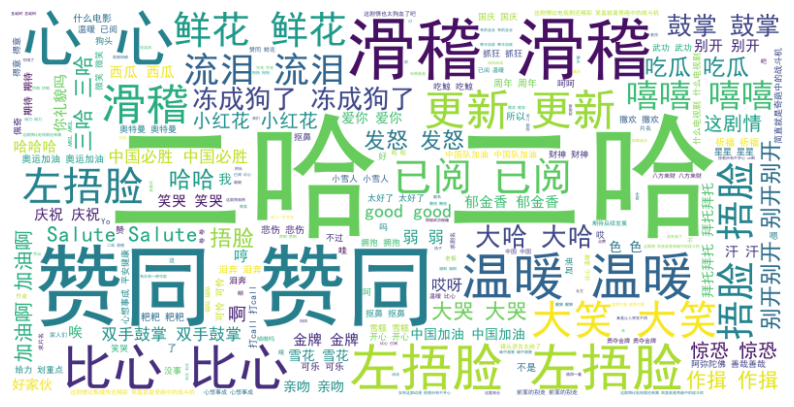

In [16]:


# ÁîüÊàêÊâÄÊúâËØÑËÆ∫ÁöÑÊñáÊú¨
comments_text = " ".join(comment_df['content'].dropna())

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìË∑ØÂæÑÔºàWindows ÈªòËÆ§Èªë‰ΩìÔºâ
wordcloud = WordCloud(width=800, height=400, background_color="white", font_path="C:\\Windows\\Fonts\\simhei.ttf").generate(comments_text)

# ÊòæÁ§∫ËØç‰∫ëÂõæ
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


ÂØπËØ•ËØç‰∫ëÂõæËøõË°åÂàÜÊûêÔºåÂèØ‰ª•ÂèëÁé∞Âá∫Áé∞ËØÑËÆ∫ËæÉÈ´òÁöÑÁöÑËØçÁªÑÂ§ßÂ§öÊòØ‰∏Ä‰∫õÊÉÖÊÑüËØçÔºåÁåúÊµãËøôÂ∫îËØ•ÊòØËØ•Âπ≥Âè∞Ë°®ÊÉÖÂåÖÁöÑÁß∞Ë∞ì„ÄÇËØ•Âπ≥Âè∞ÊâÄÊúâË°®ÊÉÖ‰ª£Á†ÅÂ¶Ç‰∏ãÔºö
```
[ÂæÆÁ¨ë][ÂºÄÂøÉ][ÊúüÂæÖ][Â§ßÁ¨ë][ÈºìÊéå][ÊÇ†Èó≤][Á¨ëÂì≠][‰∏çË¶ÅÂïä][Âïä][Âìü][Ê±ó][Êä†Èºª][Âìº][ÂèëÊÄí][ÂßîÂ±à][‰∏çÈ´òÂÖ¥][Âõß][ÊÉäÂì≠][Â§ßÂì≠][ÊµÅÊ≥™][ÂÆ≥Áæû][È™∑È´Ö][Ë°∞][ÂííÈ™Ç][ÊäìÁãÇ][ÈÑôËßÜ][ÂÜçËßÅ][ÂìàÊ¨†][Áù°Ëßâ][ÂÅ∑Á¨ë][‰Ω†ÊáÇÁöÑ][Èò¥Èô©][ÁôΩÁúº][‰∏âÂìà][‰∫åÂìà][Â§ßÂìà][Êôï][ÁñëÈóÆ][ÂæóÊÑè][ËàîÂ±è][Ëâ≤][‰∫≤‰∫≤][Âòò][Èó≠Âò¥][ÂëÜ][‰ªÄ‰πàÈ¨º][Âêê][Â∑≤ÈòÖ][Âêå‰∏ä][ÂèãÂÜõ][Áà±Èí±][Freestyle][ÂõΩÂÆù][ÁæäÈ©º][È≤úËä±][‰∏≠ÂõΩÂä†Ê≤π][Â∫ÜÁ•ù][ÁîüÊó•ËõãÁ≥ï][MicDrop][ËµûÂêå][ËçØ‰∏∏][Ëú°ÁÉõ][È∏°Ëõã][Â∞ÑÈó®][È£ûÊú∫][ÁÅ´ËΩ¶][ËΩ¶Á•®][È•∫Â≠ê][Ë¥¢Á•û][Èû≠ÁÇÆ][Á∫¢ÂåÖ][Á¶è][2018][666][Â∑¶ÊçÇËÑ∏][ÊçÇËÑ∏][ÊªëÁ®Ω][ÂòøÂìà][Ê≤°ÁúºÁúã][ÂùèÁ¨ë][Â∞¨Á¨ë][Êâìcall][Êµ™][Á∫¢Áâå][ÈªÑÁâå][Âì®Â≠ê][ÊØîÂàÜ][Âï§ÈÖí][Ë∂≥ÁêÉ][Â§ßÂäõÁ•ûÊùØ][Èî¶È≤§][ÂèåÊâãÈºìÊéå][ÁÅ´ÁÑ∞][Á•àÁ¶è][‰∫≤Âêª][Â§©‰Ωø][Ê®±Ëä±][Âä†Ê≤π][Ê≥°Ê≥°Êû™][Ê∞îÁêÉ][Ê£íÊ£íÁ≥ñ][Â∞èÈªÑÈ∏≠][Á≤ΩÂ≠ê][70Âë®Âπ¥][üçâ][‚ö°][Â••ÁâπÊõº][Â∏¶ÁùÄÂæÆÂçöÂéªÊóÖË°å][‚Üí_‚Üí][Áà±‰Ω†][üôè][Êúà‰∫Æ][n95Âè£ÁΩ©][üôã][üôä][‰∏≠ÂõΩ][Âã§Ê¥óÊâã][Âä†Ê≤π][Ê®±Ëä±][Âä†Ê≤πÂïä][Êà¥Âè£ÁΩ©][Â§©‰Ωø][‰∫≤Âêª][ËàûÁãÆ][Èº†Âπ¥Â§ßÂêâ][Á•àÁ¶è][ÁÅ´ÁÑ∞][Èí±Ë¢ã][ÁÅØÁ¨º][ÂèåÊâãÈºìÊéå][Èî¶È≤§][2020][Â∞èËÄÅÈº†][Â§ßÂäõÁ•ûÊùØ][Ë∂≥ÁêÉ][ÈìÉÈìõ][Âú£ËØûË¢ú][Âï§ÈÖí][ÊØîÂàÜ][Âú£ËØûÊ†ë][Âú£ËØûËÄÅ‰∫∫][Âì®Â≠ê][ÈªÑÁâå][Á∫¢Áâå][ÂõΩÂ∫Ü][ÂõΩÂ∫ÜÂø´‰πê][üçó][üéÑ][üëè][üëª][üíä][üí£][üí©][ü§ì][ü§ó][üëø][üò±][üôÉ][üôÖ][üôà][üôâ][üôä][üôã][üôè][Áà±‰Ω†][Â••ÁâπÊõº][ÂÖîÂ≠ê][Â§™ÂºÄÂøÉ][ÈÖ∏][ÁîüÁóÖ][‰º§ÂøÉ][Ê≤ôÂ∞òÊö¥][Â•≥Â≠©ÂÑø][Áî∑Â≠©ÂÑø][Áªø‰∏ùÂ∏¶][Á§ºÁâ©][Êå§Áúº][ËØùÁ≠í][Áªô‰Ω†Â∞èÂøÉÂøÉ][ÁªôÂäõ][Âπ≤ÊùØ][ÊÑüÂÜí][ÊµÆ‰∫ë][ËÇ•ÁöÇ][ÁÇπ‰∫ÆÂπ≥ÂÆâÁÅØ][ÂæÆÈ£é][Âõ¥ËÑñ][Âõ¥ËßÇ][Ê≠¶Ê±âÂä†Ê≤π][‰∏ãÈõ®][Èü≥‰πê][ËµûÂïä][ÁÇ∏È∏°ËÖø][ÁÖßÁõ∏Êú∫][Èíü][Áå™Â§¥][good][Êä±Êä±][ÊÇ≤‰º§][Âπ∂‰∏çÁÆÄÂçï][È¶ãÂò¥][ÂêÉÁìú][ÊâìËÑ∏][È°∂][Ë¥πËß£][NO][haha][‰ΩúÊèñ][Â∑¶ÂìºÂìº][Âè≥ÂìºÂìº][ËÄ∂][ÂøÉ][ÂòªÂòª][Êè°Êâã][ÊëäÊâã][ÊÄùËÄÉ][Â§±Êúõ][Âº±][Êã≥Â§¥][ÂñµÂñµ][Êù•][Âõ∞][ÂèØÊÄú][‰∫íÁ≤â][ÈªëÁ∫ø][Ë∑™‰∫Ü][ok][Ê¨ßËÄ∂][Â´åÂºÉ][ÊÉäÊÅê][Á§æ‰ºö][okÂïä][ÊíáÂò¥][emmm][Êöó‰∏≠ËßÇÂØü][ÊãíÁªù][ËßÇÊúõ][Ëã¶ÊÄùÂÜ•ÊÉ≥][Â••Âà©Áªô][Êå†Â§¥][ÂáùËßÜ][Êó†ÊâÄË∞ì][Êë∏Â§¥][nonono][Êè°Ëçâ][Ëã¶Á¨ë][‰∫ëÂñùÈÖí][ÁâõÊñØÊãâ][‰∫ëÁ∫¢ÂåÖ][ÁâõÁ¶èÂà∞][ÁâõÂπ¥Â§ßÂêâ][2021][Èõ™Ëä±][Á≤ΩÂ≠ê][Â§ßÁ∫¢Ëä±][Èî¶Êóó][Á®ªËçâ‰∫∫][ÂÜúÊ∞ë][Â∑•‰∫∫][Áü≥Âåñ][È¢ù][Ê≥™Â•î][Âëï][Êà≥ËÑ∏][Ëµ∞‰Ω†][È•ÆÈÖíÈÜâ][Ê∏©Êöñ][Salute][ÂèπÊ∞î][Ë£ÇÂºÄ][ÂêÉÈ≤∏][ÊØîÂøÉ][AWSL][ÊâìÂ∑•‰∫∫][Â∞èÁ∫¢Ëä±][ÈáëÁâå][ÁâõÂï§][ÊòüÊòü][ÂçäÊòü][ËôéÂπ¥Â§ßÂêâ][ËôéÂ¶ûÂ¶û][Â∞èËÑëÊñß][Èì∂Áâå][ÈìúÁâå][ÊªëÈõ™][È´òËÄÉÂä†Ê≤π][Ë•øÁìú][ÂèØ‰πê][Èõ™Á≥ï][ËÄÉÁöÑÂÖ®‰ºö][Èî¶È≤§ÈôÑ‰Ωì][È´òËÄÉÂøÖËÉú][ÈáëÊ¶úÈ¢òÂêç]
```
ÂèØ‰ª•ÁúãÂá∫ÂÖ∂ÈÉΩÁî±`[]`ÂåÖË£πÔºåËøôÂú®ÂìîÂì©ÂìîÂì©ÊäñÈü≥Á≠âÁ§æ‰∫§Â™í‰ΩìÂπ≥Âè∞ÂæàÂ∏∏ËßÅÔºåÂú®Êüê‰∫õÂπ≥Âè∞ÁîöËá≥‰ºöÊää`[]`ËΩ¨‰∏∫`„Äê„Äë`‰ª•Èò≤Ê≠¢Ë°®ÊÉÖÁöÑÊ≠ß‰πâÔºåÂõ†Ê≠§Êàë‰ª¨ÈÄöËøáÊ≠£ÂàôË°®ËææÂºèÊù•ÂéªÈô§Êéâ`[]`‰∏≠ÁöÑÂÜÖÂÆπÔºåÂπ∂ÁªüËÆ°ËØçÈ¢ëÔºåÂæóÂà∞Â¶Ç‰∏ãÁªìÊûúÔºö


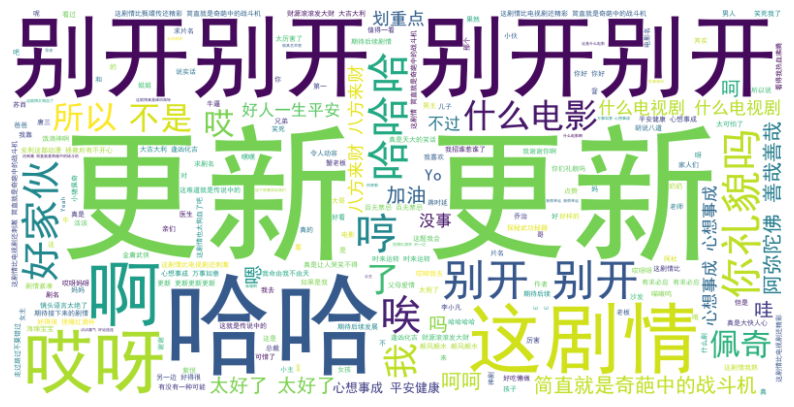

In [ ]:

import re
# ÂÆö‰πâÊ≠£ÂàôË°®ËææÂºèÊ®°ÂºèÊù•ÂåπÈÖçË°®ÊÉÖÂåÖ‰ª£Á†Å
pattern = re.compile(r'\[.*?\]')
# ÂØπÊØè‰∏™ËØÑËÆ∫ËøõË°åÂ§ÑÁêÜ
comments_text = " ".join([re.sub(pattern, "", comment) for comment in comment_df['content'].dropna()])

# ËÆæÁΩÆ‰∏≠ÊñáÂ≠ó‰ΩìË∑ØÂæÑÔºàWindows ÈªòËÆ§Èªë‰ΩìÔºâ
wordcloud = WordCloud(width=800, height=400, background_color="white", font_path="C:\\Windows\\Fonts\\simhei.ttf").generate(comments_text)

# ÊòæÁ§∫ËØç‰∫ëÂõæ
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ëøô‰∏™ÂΩ±ËßÜÂå∫ÁöÑËØç‰∫ëÂèçÊò†‰∫ÜËßÇ‰ºóÂØπÂâßÊÉÖ„ÄÅËßíËâ≤„ÄÅÊõ¥Êñ∞ÊÉÖÂÜµÁöÑÂÖ≥Ê≥®ÔºåÂêåÊó∂‰πü‰ΩìÁé∞‰∫Ü‰ªñ‰ª¨Âú®ËßÇÁúãËøáÁ®ã‰∏≠ÁöÑÂêÑÁßçÊÉÖÁª™„ÄÇ